<a href="https://colab.research.google.com/github/charlespimentel/PROJ_QUEIMA_BR/blob/main/Inpe_12_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS**

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime

**DATASETS DE JANEIRO DE 2012 a 2020**- PANTANAL - INPE


Os datasets foram baixados, ano a ano, em 04/04/2021 no endereço https://queimadas.dgi.inpe.br//queimadas/bdqueimadas/#tabela-de-atributos

In [2]:
df2012 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2012-01-01_2012-12-31.csv', sep=',')
df2013 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2013-01-01_2013-12-31.csv', sep=',')
df2014 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2014-01-01_2014-12-31.csv', sep=',')
df2015 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2015-01-01_2015-12-31.csv', sep=',')
df2016 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2016-01-01_2016-12-31.csv', sep=',')
df2017 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2017-01-01_2017-12-31.csv', sep=',')
df2018 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2018-01-01_2018-12-31.csv', sep=',')
df2019 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2019-01-01_2019-12-31.csv', sep=',')
df2020 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/PROJ_QUEIMA_BR/main/Data_Inpe_12_21/Focos_2020-01-01_2020-12-31.csv', sep=',')

**UNINDO OS 9 DATASETS**

In [3]:
#Unindo os 9 datasets
df = pd.concat([df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020])

**PRIMEIRAS LINHAS DO DATASET**

In [4]:
df.head() #primeiras linhas

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2012/01/07 05:02:00,AQUA_M-M,Brasil,MATO GROSSO,POCONE,Pantanal,NaN,NaN,NaN,-17.138,-57.326,NaN
1,2012/01/07 05:02:00,AQUA_M-M,Brasil,MATO GROSSO,CACERES,Pantanal,NaN,NaN,NaN,-16.914,-57.693,NaN
2,2012/01/07 05:02:00,AQUA_M-M,Brasil,MATO GROSSO,POCONE,Pantanal,NaN,NaN,NaN,-17.118,-57.322,NaN
3,2012/01/07 05:02:00,AQUA_M-M,Brasil,MATO GROSSO,POCONE,Pantanal,NaN,NaN,NaN,-17.117,-57.327,NaN
4,2012/01/07 05:02:00,AQUA_M-M,Brasil,MATO GROSSO,CACERES,Pantanal,NaN,NaN,NaN,-16.901,-57.704,NaN


**ÚLTIMAS LINHAS DO DATASET**

In [5]:
df.tail() #últimas linhas

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
742972,2020/10/13 18:43:22,GOES-16,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.4,0.0,-19.7000,-57.0500,NaN
742973,2020/10/13 16:33:00,NOAA-20,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.5,0.0,-18.8318,-57.0566,NaN
742974,2020/10/13 16:33:00,NOAA-20,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,7.1,0.5,-17.2116,-56.1356,NaN
742975,2020/10/13 16:33:00,NOAA-20,Brasil,MATO GROSSO,ITIQUIRA,Pantanal,0.0,0.0,0.4,-17.4440,-55.1032,NaN
742976,2020/10/13 16:33:00,NOAA-20,Brasil,MATO GROSSO,ITIQUIRA,Pantanal,0.0,0.0,0.5,-17.4075,-55.1013,NaN


**TAMANHO DO DATASET**

In [6]:
print(f'Tamanho do Dataframe: {df.shape[0]} linhas e {df.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 1327467 linhas e 12 colunas


**APENAS SATÉLITE NPP-375**

In [7]:
df = df[df['satelite'] == 'NPP-375']

**TAMANHO DO DATASET**

In [8]:
print(f'Tamanho do Dataframe: {df.shape[0]} linhas e {df.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 480926 linhas e 12 colunas


**PRIMEIRAS LINHAS DO DATASET**

In [9]:
df.head(5) #primeiras linhas

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
468,2012/02/07 16:46:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-19.6091,-57.3519,NaN
502,2012/02/08 16:27:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-19.6463,-57.3300,NaN
530,2012/02/10 17:31:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-18.6448,-57.2347,NaN
531,2012/02/10 17:31:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-19.0780,-57.4382,NaN
532,2012/02/10 05:00:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,NaN,NaN,NaN,-18.8916,-57.7218,NaN


**INFORMAÇÕES GERAIS DO DATASET**

In [10]:
df.describe().round(2) # Resume e descreve algumas operações gerais do Dataset. Round(2) arredonda para 2 casas decimais.

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,402278.00,402278.00,402278.00,480926.00,480926.00,287788.00
mean,13.56,0.71,-12.68,-18.16,-56.92,15.47
std,18.05,3.48,115.21,1.36,0.80,28.74
min,0.00,0.00,-999.00,-22.13,-59.18,0.10
25%,3.00,0.00,0.60,-19.29,-57.52,3.50
50%,7.00,0.00,1.00,-17.83,-57.12,7.30
75%,17.00,0.00,1.00,-17.03,-56.25,15.90
max,117.00,138.00,1.00,-15.53,-54.92,1945.20


In [11]:
print(df.riscofogo.count()) #Contagem de dados não-nulos de uma coluna específica

402278


In [12]:
print(df['riscofogo'].isna().sum()) #Contagem de dados nulos de uma coluna específica

78648


**RETIRANDO AS LINHAS COM riscofogo = NaN**

**Informação sobre Risco Fogo**
*   Mínimo, abaixo de 0,15;
*   Baixo, de 0,15 a 0,4;
*   Médio, de 0,4 a 0,7;
*   Alto, de 0,7 a 0,95 e;
*   Crítico, acima de 0.95.

In [13]:
df = df.dropna(subset=["riscofogo"])

In [14]:
df.head(5)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
2,2014/10/15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9664,-57.4599,NaN
3,2014/10/09 17:15:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,1.0,-19.8841,-57.3938,NaN
4,2014/10/15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9342,-57.3920,NaN
5,2014/10/15 17:03:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,1.0,-18.5320,-56.6813,NaN
6,2014/10/15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,0.8,-19.9478,-57.3313,NaN


**SEPARANDO DATA E HORA - PARTE 1 - Transformando a coluna para datetime**

In [15]:
df['datahora'] = pd.to_datetime(df['datahora'])

**SEPARANDO DATA E HORA - PARTE 2**

In [16]:
# Coluna 'Data'
df['Data'] = df['datahora'].dt.strftime('%Y-%m-%d')
# Coluna 'Hora'
df['Hora'] = df['datahora'].dt.strftime('%H:%M:%S')

In [17]:
df.head(5)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora
2,2014-10-15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9664,-57.4599,NaN,2014-10-15,17:02:00
3,2014-10-09 17:15:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,1.0,-19.8841,-57.3938,NaN,2014-10-09,17:15:00
4,2014-10-15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9342,-57.3920,NaN,2014-10-15,17:02:00
5,2014-10-15 17:03:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,1.0,-18.5320,-56.6813,NaN,2014-10-15,17:03:00
6,2014-10-15 17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,0.8,-19.9478,-57.3313,NaN,2014-10-15,17:02:00


**DELETANDO A COLUNA datahora**


In [18]:
# Remove a coluna 'Data e Hora'
del df['datahora']

In [19]:
df.head(5)

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora
2,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9664,-57.4599,NaN,2014-10-15,17:02:00
3,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,1.0,-19.8841,-57.3938,NaN,2014-10-09,17:15:00
4,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9342,-57.3920,NaN,2014-10-15,17:02:00
5,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,1.0,-18.5320,-56.6813,NaN,2014-10-15,17:03:00
6,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,0.8,-19.9478,-57.3313,NaN,2014-10-15,17:02:00


**TAMANHO DO DATASET APÓS PRIMEIRA LIMPEZA**

In [20]:
print(f'Tamanho do Dataframe: {df.shape[0]} linhas e {df.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 402278 linhas e 13 colunas


**RETIRAR riscofogo MENOR QUE 0**

In [22]:
indexNames = df[df['riscofogo'] < 0].index
df.drop(indexNames , inplace=True)

In [23]:
df

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora
2,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9664,-57.4599,NaN,2014-10-15,17:02:00
3,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,1.0,-19.8841,-57.3938,NaN,2014-10-09,17:15:00
4,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9342,-57.3920,NaN,2014-10-15,17:02:00
5,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,1.0,-18.5320,-56.6813,NaN,2014-10-15,17:03:00
6,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,0.8,-19.9478,-57.3313,NaN,2014-10-15,17:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742931,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,11.0,0.0,1.0,-17.4586,-55.9273,1.9,2020-10-02,05:06:00
742940,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,4.0,6.8,0.6,-17.7191,-57.3138,3.3,2020-10-12,05:18:00
742942,NPP-375,Brasil,MATO GROSSO,CACERES,Pantanal,4.0,5.4,0.3,-17.1433,-57.4232,2.8,2020-10-12,05:18:00
742956,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.0,0.9,-17.6902,-57.0022,1.3,2020-10-03,04:48:00


**ORGANIZANDO PRIMEIRA LINHA DO DATAFRAME**

In [25]:
df = df[['Data','Hora','satelite','pais','estado','municipio','bioma','diasemchuva','precipitacao','riscofogo','latitude','longitude','frp']]

In [26]:
df

,Data,Hora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
2,2014-10-15,17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9664,-57.4599,NaN
3,2014-10-09,17:15:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,2.0,0.0,1.0,-19.8841,-57.3938,NaN
4,2014-10-15,17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,1.0,-19.9342,-57.3920,NaN
5,2014-10-15,17:03:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.0,1.0,-18.5320,-56.6813,NaN
6,2014-10-15,17:02:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,8.0,0.0,0.8,-19.9478,-57.3313,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742931,2020-10-02,05:06:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,11.0,0.0,1.0,-17.4586,-55.9273,1.9
742940,2020-10-12,05:18:00,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,4.0,6.8,0.6,-17.7191,-57.3138,3.3
742942,2020-10-12,05:18:00,NPP-375,Brasil,MATO GROSSO,CACERES,Pantanal,4.0,5.4,0.3,-17.1433,-57.4232,2.8
742956,2020-10-03,04:48:00,NPP-375,Brasil,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.0,0.9,-17.6902,-57.0022,1.3


**DATASET QUEIMADAS**

In [27]:
from google.colab import drive

In [28]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [30]:
!git clone https://github.com/charlespimentel/PROJ_QUEIMA_BR

Cloning into 'PROJ_QUEIMA_BR'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 292 (delta 146), reused 134 (delta 42), pack-reused 0
Receiving objects: 100% (292/292), 34.84 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [31]:
pip install geopandas

     |████████████████████████████████| 1.0MB 5.3MB/s 
     |████████████████████████████████| 15.3MB 328kB/s 
     |████████████████████████████████| 6.5MB 48.9MB/s 


In [33]:
import geopandas as gpd

In [34]:
queimadas_df_2012 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2012_pantanal.shp')
queimadas_df_2013 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2013_pantanal.shp')
queimadas_df_2014 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2014_pantanal.shp')
queimadas_df_2015 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2015_pantanal.shp')
queimadas_df_2016 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2016_pantanal.shp')
queimadas_df_2017 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2017_pantanal.shp')
queimadas_df_2018 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2018_pantanal.shp')
queimadas_df_2019 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2019_pantanal.shp')
queimadas_df_2020 = gpd.read_file('PROJ_QUEIMA_BR/Data_Lasa_12_21/alarmes_hist_2020_pantanal.shp')

In [35]:
#Unindo os 9 datasets
queimadas_df_ = pd.concat([queimadas_df_2012, queimadas_df_2013, queimadas_df_2014, queimadas_df_2015, queimadas_df_2016, queimadas_df_2017, queimadas_df_2018, queimadas_df_2019, queimadas_df_2020])

In [36]:
queimadas_df_

,DiaJuliano,Mes,Ano,Versao,NivConf,geometry
0,260,09,2012,Alarmes-Histórico,0.3490,"POLYGON ((-57.65500 -15.77500, -57.66000 -15.7..."
1,258,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.65500 -15.78000, -57.66000 -15.7..."
2,298,10,2012,Alarmes-Histórico,0.3176,"POLYGON ((-57.58000 -15.83000, -57.58500 -15.8..."
3,253,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-57.74000 -15.85000, -57.74500 -15.8..."
4,235,08,2012,Alarmes-Histórico,0.3451,"POLYGON ((-57.85000 -15.86000, -57.85500 -15.8..."
...,...,...,...,...,...,...
98955,217,08,2020,Alarmes-Histórico,0.3804,"POLYGON ((-57.98000 -22.08500, -57.98500 -22.0..."
98956,217,08,2020,Alarmes-Histórico,0.8902,"POLYGON ((-57.99000 -22.09000, -57.99500 -22.0..."
98957,217,08,2020,Alarmes-Histórico,0.9490,"POLYGON ((-57.98500 -22.09000, -57.99000 -22.0..."
98958,217,08,2020,Alarmes-Histórico,0.6784,"POLYGON ((-57.98000 -22.09000, -57.98500 -22.0..."


In [37]:
tost = queimadas_df_.copy()
tost= tost.to_crs({'init': 'epsg:3857'})
print (tost.crs)
tost.head(2)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


+init=epsg:3857 +type=crs


,DiaJuliano,Mes,Ano,Versao,NivConf,geometry
0,260,09,2012,Alarmes-Histórico,0.3490,"POLYGON ((-6418125.242 -1778681.098, -6418681...."
1,258,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-6418125.242 -1779259.486, -6418681...."


In [38]:
tost["area"] = tost['geometry'].area/ 10**6
tost

,DiaJuliano,Mes,Ano,Versao,NivConf,geometry,area
0,260,09,2012,Alarmes-Histórico,0.3490,"POLYGON ((-6418125.242 -1778681.098, -6418681....",0.321922
1,258,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-6418125.242 -1779259.486, -6418681....",0.321929
2,298,10,2012,Alarmes-Histórico,0.3176,"POLYGON ((-6409776.280 -1785044.155, -6410332....",0.322009
3,253,09,2012,Alarmes-Histórico,0.3961,"POLYGON ((-6427587.398 -1787358.423, -6428143....",0.322041
4,235,08,2012,Alarmes-Histórico,0.3451,"POLYGON ((-6439832.542 -1788515.643, -6440389....",0.322057
...,...,...,...,...,...,...,...
98955,217,08,2020,Alarmes-Histórico,0.3804,"POLYGON ((-6454304.076 -2521733.563, -6454860....",0.334326
98956,217,08,2020,Alarmes-Histórico,0.8902,"POLYGON ((-6455417.271 -2522334.244, -6455973....",0.334338
98957,217,08,2020,Alarmes-Histórico,0.9490,"POLYGON ((-6454860.674 -2522334.244, -6455417....",0.334338
98958,217,08,2020,Alarmes-Histórico,0.6784,"POLYGON ((-6454304.076 -2522334.244, -6454860....",0.334338


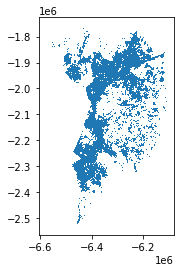

In [39]:
tost.plot()

In [42]:
world = tost

In [43]:
world.geometry.name

'geometry'

In [44]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [45]:
world.geometry.name

'borders'

In [46]:
world['centroid_column'] = world.centroid

In [47]:
world = world.set_geometry('centroid_column')

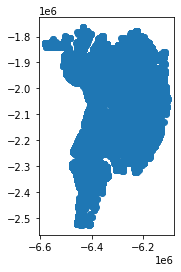

In [48]:
world.plot()

In [49]:
world['centroid_column'].head()

0    POINT (-6418403.540 -1778391.911)
1    POINT (-6418403.540 -1778970.292)
2    POINT (-6410054.579 -1784754.889)
3    POINT (-6427865.697 -1787069.129)
4    POINT (-6440110.841 -1788226.334)
Name: centroid_column, dtype: geometry

In [51]:
gpd.options.display_precision = 9

In [52]:
world['centroid_column'].head()

0    POINT (-6418403.540449318 -1778391.910910133)
1    POINT (-6418403.540449318 -1778970.292094022)
2    POINT (-6410054.578656507 -1784754.889249812)
3    POINT (-6427865.697127813 -1787069.128582859)
4    POINT (-6440110.841170693 -1788226.334199942)
Name: centroid_column, dtype: geometry